In [1]:
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle

In [2]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('./data_vasochange/train_withterm.csv')

In [4]:
df_test = pd.read_csv('./data_vasochange/test_withterm.csv')

In [5]:
df_val = pd.read_csv('./data_vasochange/val_withterm.csv')

In [6]:
df_orig = pd.read_csv('./data_vasochange/rl_original.csv')

In [7]:
print(len(df_orig.index), df_orig['icustayid'].nunique(), df_train['icustayid'].nunique(), df_test['icustayid'].nunique(), df_val['icustayid'].nunique())

278378 20938 16629 2160 2149


In [8]:
df_train.head()

,bloc,icustayid,mortality_90d,gender,re_admission,mechvent,max_dose_vaso,age,Weight_kg,GCS,...,input_total,input_4hourly,output_total,output_4hourly,action,shaped_reward,io_ac,vc_ac,abchange_vc,max_dose_vaso_original
0,1,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.187300,0.705956,...,0.391651,0.52761,0.786192,0.702781,10,-1.224270,2,0,0.0,0.0
1,2,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.187300,0.705956,...,0.394176,0.52761,0.793676,0.596530,10,1.640796,2,0,0.0,0.0
2,3,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.187300,0.705956,...,0.396682,0.52761,0.799286,0.516950,10,-0.025000,2,0,0.0,0.0
3,4,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.155313,0.705956,...,0.399169,0.52761,0.805952,0.575231,10,-0.025000,2,0,0.0,0.0
4,5,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.147317,0.705956,...,0.401637,0.52761,0.816227,0.714111,10,-0.025000,2,0,0.0,0.0


In [9]:
deeprl2_testactions = pickle.load(open( './sepsisRL/vasochange4_dqn_normal/dqn_normal_actions_test.p','rb' ))

In [10]:
deeprl2_valactions = pickle.load(open( './sepsisRL/vasochange4_dqn_normal/dqn_normal_actions_val.p','rb' ))

In [11]:
deeprl2_trainactions = pickle.load(open( './sepsisRL/vasochange4_dqn_normal/dqn_normal_actions_train.p','rb' ))

In [12]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [13]:
inv_action_map

{0: [0, 0],
 1: [0, 1],
 2: [0, 2],
 3: [0, 3],
 4: [0, 4],
 5: [1, 0],
 6: [1, 1],
 7: [1, 2],
 8: [1, 3],
 9: [1, 4],
 10: [2, 0],
 11: [2, 1],
 12: [2, 2],
 13: [2, 3],
 14: [2, 4],
 15: [3, 0],
 16: [3, 1],
 17: [3, 2],
 18: [3, 3],
 19: [3, 4],
 20: [4, 0],
 21: [4, 1],
 22: [4, 2],
 23: [4, 3],
 24: [4, 4]}

In [14]:
test_actions_arr = np.array([inv_action_map[i] for i in deeprl2_testactions])

val_actions_arr = np.array([inv_action_map[i] for i in deeprl2_valactions])

train_actions_arr = np.array([inv_action_map[i] for i in deeprl2_trainactions])

In [15]:
df_test['agent_iv'] = test_actions_arr[:,0]
df_test['agent_vaso'] = test_actions_arr[:,1]

df_val['agent_iv'] = val_actions_arr[:,0]
df_val['agent_vaso'] = val_actions_arr[:,1]

df_train['agent_iv'] = train_actions_arr[:,0]
df_train['agent_vaso'] = train_actions_arr[:,1]

In [16]:
df_train.head()

,bloc,icustayid,mortality_90d,gender,re_admission,mechvent,max_dose_vaso,age,Weight_kg,GCS,...,output_total,output_4hourly,action,shaped_reward,io_ac,vc_ac,abchange_vc,max_dose_vaso_original,agent_iv,agent_vaso
0,1,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.187300,0.705956,...,0.786192,0.702781,10,-1.224270,2,0,0.0,0.0,2,0
1,2,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.187300,0.705956,...,0.793676,0.596530,10,1.640796,2,0,0.0,0.0,1,0
2,3,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.187300,0.705956,...,0.799286,0.516950,10,-0.025000,2,0,0.0,0.0,1,0
3,4,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.155313,0.705956,...,0.805952,0.575231,10,-0.025000,2,0,0.0,0.0,2,0
4,5,3,1,-0.5,-0.5,-0.5,-2.302585,-0.978344,-0.147317,0.705956,...,0.816227,0.714111,10,-0.025000,2,0,0.0,0.0,2,0


In [17]:
rl_data = pd.concat([df_train, df_test],ignore_index=True, axis=0)

In [18]:
rl_data = pd.concat([rl_data, df_val], ignore_index=True, axis =0)

In [19]:
rl_data.shape

(278378, 58)

In [20]:
rl_data.tail()

,bloc,icustayid,mortality_90d,gender,re_admission,mechvent,max_dose_vaso,age,Weight_kg,GCS,...,output_total,output_4hourly,action,shaped_reward,io_ac,vc_ac,abchange_vc,max_dose_vaso_original,agent_iv,agent_vaso
278373,9,99749,0,0.5,0.5,-0.5,-0.853316,-0.840308,-0.815039,0.705956,...,0.679972,1.098854,23,1.868612,4,3,0.021,0.326,1,3
278374,10,99749,0,0.5,0.5,-0.5,-0.901402,-0.840308,-0.815039,0.705956,...,0.704856,0.853826,18,-0.590823,3,3,-0.020,0.306,1,3
278375,11,99749,0,0.5,0.5,-0.5,-0.957113,-0.840308,-0.815039,0.705956,...,0.710342,0.415960,18,-0.924432,3,3,-0.022,0.284,4,2
278376,12,99749,0,0.5,0.5,-0.5,-1.203973,-0.840308,-0.815039,0.705956,...,0.718773,0.552305,22,-0.025000,4,2,-0.084,0.200,2,0
278377,13,99749,0,0.5,0.5,-0.5,-1.203973,-0.840308,-0.815039,0.705956,...,0.727599,0.575231,17,15.000000,3,2,0.000,0.200,2,4


In [21]:
##### extract the columns of interest to examine the feature importance
state_features_vc_clinician = ['gender','mechvent','re_admission', 'age','Weight_kg','GCS','HR','SysBP','MeanBP',
                  'DiaBP','RR','Temp_C','FiO2_1','Potassium','Sodium','Chloride','Glucose','Magnesium','Calcium','Hb',
                  'WBC_count','Platelets_count','PTT','PT','Arterial_pH','paO2','paCO2','Arterial_BE','HCO3',
                  'Arterial_lactate','SOFA','SIRS','Shock_Index','PaO2_FiO2','cumulated_balance', 'SpO2','BUN',
                  'Creatinine','SGOT','SGPT','Total_bili','INR','input_total','input_4hourly','output_total', 
                  'output_4hourly', 'vc_ac']

In [22]:
state_features_vc_ai = ['gender','mechvent','re_admission', 'age','Weight_kg','GCS','HR','SysBP','MeanBP',
                  'DiaBP','RR','Temp_C','FiO2_1','Potassium','Sodium','Chloride','Glucose','Magnesium','Calcium','Hb',
                  'WBC_count','Platelets_count','PTT','PT','Arterial_pH','paO2','paCO2','Arterial_BE','HCO3',
                  'Arterial_lactate','SOFA','SIRS','Shock_Index','PaO2_FiO2','cumulated_balance', 'SpO2','BUN',
                  'Creatinine','SGOT','SGPT','Total_bili','INR','input_total','input_4hourly','output_total', 
                  'output_4hourly', 'agent_vaso']

In [23]:
df_clinician = rl_data[state_features_vc_clinician]
df_ai = rl_data[state_features_vc_ai]

In [24]:
labels_clinician = np.array(df_clinician['vc_ac'])
labels_clinician[labels_clinician > 0] = 1 
df_clinician['vc_ac'] = labels_clinician

labels_ai = np.array(df_ai['agent_vaso'])
labels_ai[labels_ai > 0] = 1 
df_ai['agent_vaso'] = labels_ai

/Users/yan/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yan/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
y_train = df_clinician['vc_ac']
X_train = df_clinician.drop('vc_ac', axis = 1)

In [26]:
y_train1 = df_ai['agent_vaso']
X_train1 = df_ai.drop('agent_vaso', axis = 1)

In [27]:
clf = RandomForestClassifier(n_estimators=100,  n_jobs=-1, oob_score = True, bootstrap = True, random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
clf1 = RandomForestClassifier(n_estimators=100,  n_jobs=-1, oob_score = True, bootstrap = True, random_state=42)
clf1.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
from sklearn.ensemble.forest import _generate_unsampled_indices
def oob_classifier_accuracy(clf, X_train, y_train):
    """
    Compute out-of-bag (OOB) accuracy for a scikit-learn random forest
    classifier. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L425
    """
    X = X_train.values
    y = y_train.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in clf.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [clf.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score

/Users/yan/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
from sklearn.ensemble.forest import _generate_unsampled_indices
def oob_classifier_accuracy1(clf1, X_train1, y_train1):
    """
    Compute out-of-bag (OOB) accuracy for a scikit-learn random forest
    classifier. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L425
    """
    X = X_train1.values
    y = y_train1.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in clf1.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [clf1.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score

In [31]:
## function for creating a feature importance dataframe
#def imp_df(column_names, importances):
#    df = pd.DataFrame({'feature': column_names,
#                       'feature_importance': importances}) \
#           .sort_values('feature_importance', ascending = False) \
#           .reset_index(drop = True)
#    return df

## plotting a feature importance dataframe (horizontal barchart)
#def var_imp_plot(imp_df, title):
#    imp_df.columns = ['feature', 'feature_importance']
#    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
#       .set_title(title, fontsize = 20)

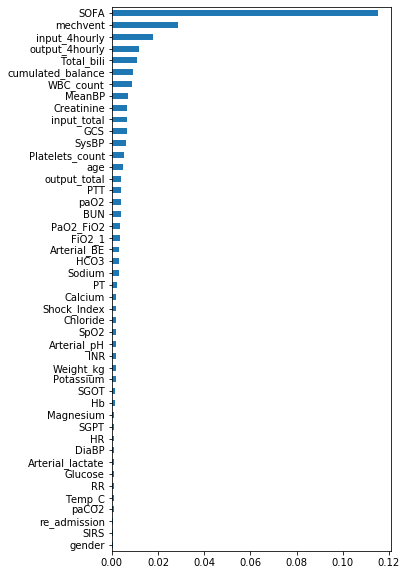

In [32]:
#### different ways to calculate the feature importance (here we use sklearn permutation importance)
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_train, y_train, n_repeats=10, scoring = oob_classifier_accuracy,
                                random_state=42)
#sorted_idx = result.importances_mean.argsort()
feat_importances_sk = pd.Series(result.importances_mean, index=X_train.columns)
feat_importances_sk = feat_importances_sk.sort_values(ascending=True)
feat_importances_sk.plot(kind='barh', figsize=(5,10))
plt.show()

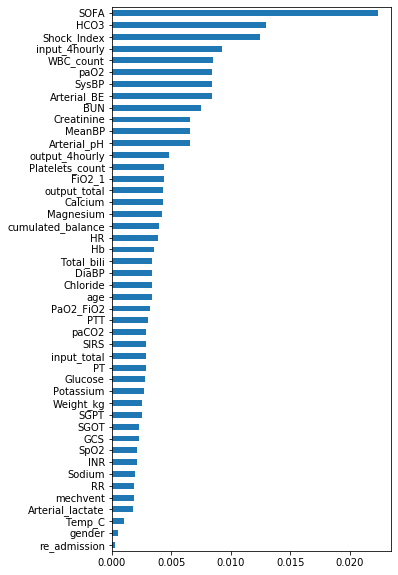

In [33]:
result1 = permutation_importance(clf1, X_train1, y_train1, n_repeats=10, scoring = oob_classifier_accuracy1,
                                random_state=42)

feat_importances_sk1 = pd.Series(result1.importances_mean, index=X_train1.columns)
feat_importances_sk1 = feat_importances_sk1.sort_values(ascending=True)
feat_importances_sk1.plot(kind='barh', figsize=(5,10))
plt.show()

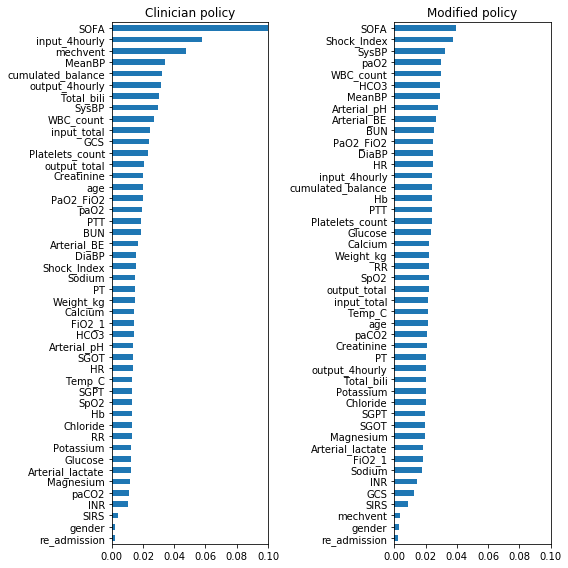

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances1 = pd.Series(clf1.feature_importances_, index=X_train1.columns)
feat_importances1 = feat_importances1.sort_values(ascending=True)
feat_importances.plot(ax=ax1, kind='barh')
feat_importances1.plot(ax=ax2, kind='barh')
ax1.set_title("Clinician policy")
ax1.set_xlim([0, 0.1])
ax2.set_title("Modified policy")
ax2.set_xlim([0, 0.1])
fig.tight_layout()
plt.show()

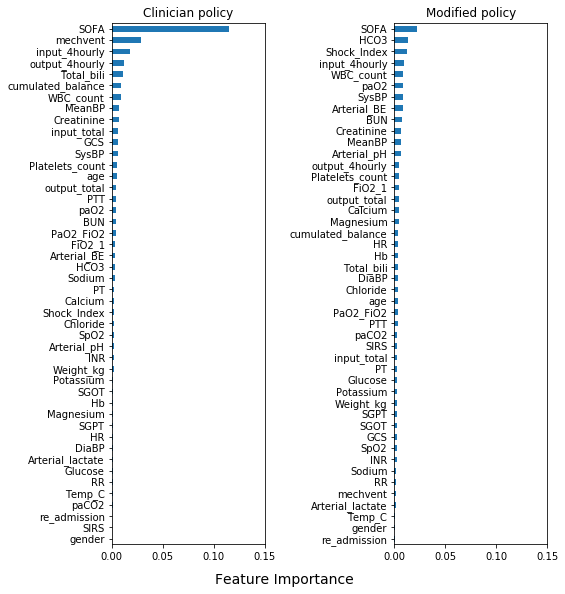

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
#feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
#feat_importances = feat_importances.sort_values(ascending=True)

feat_importances_sk.plot(ax=ax1, kind='barh')
feat_importances_sk1.plot(ax=ax2, kind='barh')
ax1.set_title("Clinician policy")
ax1.set_xlim([0, 0.15])
ax2.set_title("Modified policy")
ax2.set_xlim([0, 0.15])
fig.text(0.5, -0.02, 'Feature Importance', ha='center', fontsize=14)
#fig.text(-0.02, 0.5, 'Features', va='center', rotation='vertical', fontsize = 15)
fig.tight_layout()
plt.show()

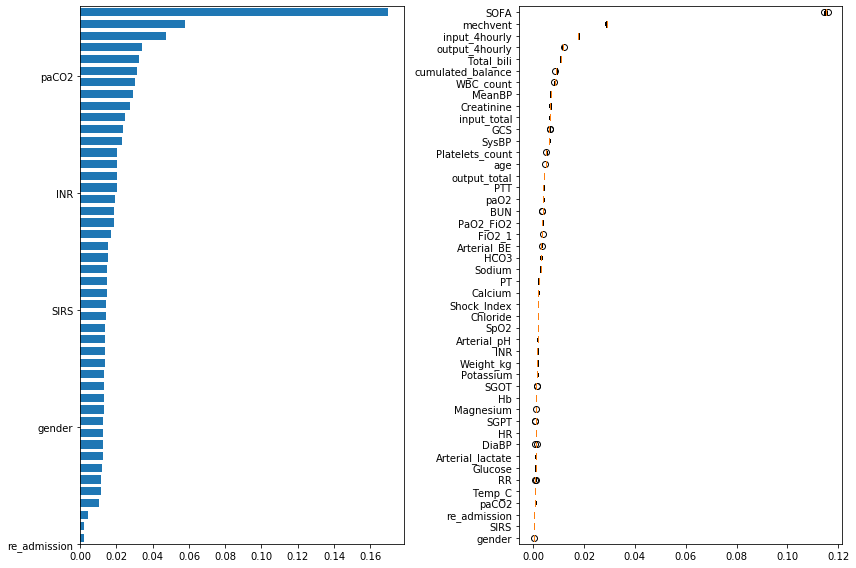

In [38]:
### blox plot of the feature importance
sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])

#ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
fig.tight_layout()
plt.show()

/Users/yan/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/yan/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


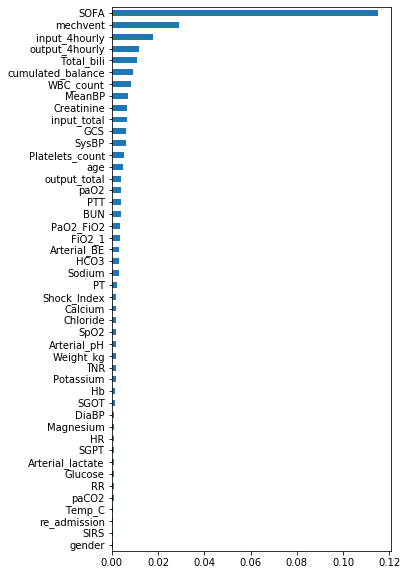

In [39]:
########## another two libraries to calculate the feature importance
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clf, cv = None, scoring = oob_classifier_accuracy, refit = False, n_iter = 10).fit(X_train, y_train)
feat_importances_eli = pd.Series(perm.feature_importances_, index=X_train.columns)
feat_importances_elitt = feat_importances_eli.sort_values(ascending=True)
feat_importances_elitt.plot(kind='barh', figsize=(5,10))
plt.show()

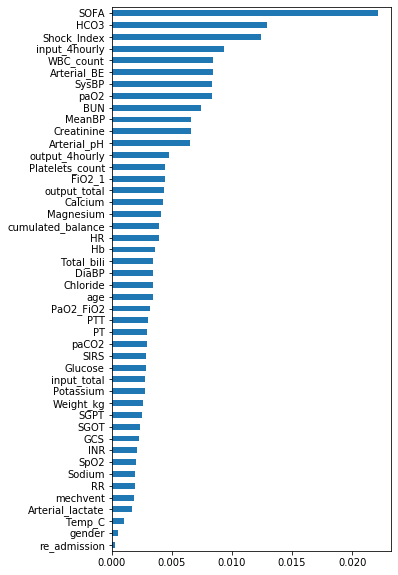

In [40]:
perm1 = PermutationImportance(clf1, cv = None, scoring = oob_classifier_accuracy1, refit = False, n_iter = 10).fit(X_train1, y_train1)
feat_importances_eli1 = pd.Series(perm1.feature_importances_, index=X_train1.columns)
feat_importances_eli1 = feat_importances_eli1.sort_values(ascending=True)
feat_importances_eli1.plot(kind='barh', figsize=(5,10))
plt.show()

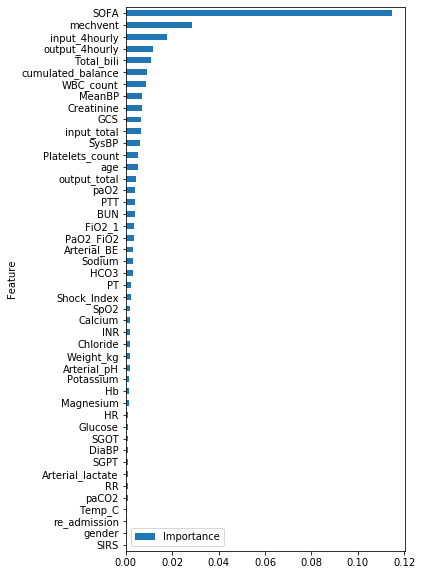

In [41]:
from rfpimp import permutation_importances
perm_imp_rfpimp = permutation_importances(clf, X_train, y_train, oob_classifier_accuracy, n_samples=X_train.shape[0])
perm_imp_rfpimp = perm_imp_rfpimp.sort_values(by = 'Importance', ascending=True)
perm_imp_rfpimp.plot(kind='barh', figsize=(5,10))

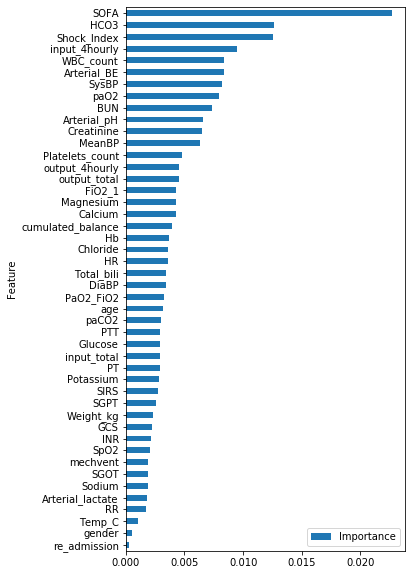

In [42]:
from rfpimp import permutation_importances
perm_imp_rfpimp1 = permutation_importances(clf1, X_train1, y_train1, oob_classifier_accuracy1, n_samples=X_train1.shape[0])
perm_imp_rfpimp1 = perm_imp_rfpimp1.sort_values(by = 'Importance', ascending=True)
perm_imp_rfpimp1.plot(kind='barh', figsize=(5,10))